# Life-Satisfaction Analysis 
The goal of this analysis is to find and select the most important factors that are correlated to self-reported life-satisfaction. Potential factors are all matters that are captured in the survey questions.

This project was part of the course "Bayesian Machine Learning". **For a more comprehensive and non-technical overview, see the corresponding paper in the repository.**
# Introduction 
For policy makers, psychologists or social scientists, the precondition of being able to increase life satisfaction amongst a population or individuals, is the knowledge on what influences it. Since decades, data on subjective life-satisfaction and related well-being measures have been collected through polls and analysed (Diener & Suh 1997, Oishi et al., 2009). Measures of subjective well-being can be obtained by a self-report on a numerical scale (Diener et al., 2002).  
 
Besides the empirical analyses, theoretical frameworks about life-satisfaction have been developed. Maslow (1943) proposes a classification hierarchy of human needs which is known as the Maslow's hierarchy of needs. Based on this classification hierarchy, Maslow et al. (1970) introduces a need-gratification theory of life satisfaction. He suggests that someone's life satisfaction correlates with the degree of the fulfilment of the personalized needs. The satisfaction of these needs differs across nations, as for example people in less wealthy nations lack financial security more often than people in wealthier societies. Subsequently, life satisfaction has been found to be varying across nations along with the fulfilment of these needs (Veenhoven, 1991; Diener & Diener, 2009; Oishi et al., 2009).  
 
These global comparisons are important for international development policies and inter-cultural research. However, for national policies and domestic insights, lifesatisfaction and correlating factors within a country are of interest. In this study, predictive factors on life-satisfaction for the contemporary German population are analysed. Moreover, the sample is clustered into two subgroups which are described and on which a more customized life-satisfaction analysis is conducted.  
Data 

# Data Description and Preparation
To find relevant factors to life-satisfaction, survey data from Germany from 2013 is analysed. The survey was conducted as a part of the the World Value Survey which is a longitudinal multi-national survey research project, started in 1981 (Inglehart, 2014). In the analysed survey, around 2000 randomly selected participants were interviewed on questions about politics, moral values, traditions, religion and their state of life. Overall, around two hundred questions are asked. One of the questions is on personal life-satisfaction, where the answer could be given on a scale from 1 to 10, where 10 is the highest self-reported life-satisfaction. The distribution of this variable is shown below (Figure 1). 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df_orig = pd.read_excel("WVS2.xlsx")

The German data for 2013 and all related documents can be found here: http://www.worldvaluessurvey.org/WVSDocumentationWV6.jsp

In [4]:
df=df_orig

## Data Overview

In [6]:
df.shape

(2046, 430)

In [5]:
df.head()

,V1: Wave,V2: Country Code,V2A: Country/regions [with split ups],V3: Interview number,V4: Important in life: Family,V5: Important in life: Friends,V6: Important in life: Leisure time,V7: Important in life: Politics,V8: Important in life: Work,V9: Important in life: Religion,...,I_ABORTLIB: Emancipative Values-3: Abortion acceptable,I_DIVORLIB: Emancipative Values-3: Divorce acceptable,CHOICE: Emancipative Values-3: Choice sub-index,WEIGHT3B: Emancipative Values-3: Weight3b,I_VOICE1: Emancipative Values-4: Voice 1,I_VOICE2: Emancipative Values-4: Voice2,I_VOI2_00: Emancipative Values-4: Voi2_00 (auxiliary),VOICE: Emancipative Values-4: Voice sub-index,WEIGHT4B: Emancipative Values-4: Weight 4b,COW: COW Country Code
0,6,276,900,138,1,2,2,2,3,2,...,0.333333,0.222222,0.333333,1.00,0.66,1.0,0.83,0.83,1.0,255
1,6,276,900,160,1,1,2,3,1,3,...,0.111111,0.000000,0.111111,1.00,0.66,1.0,0.83,0.83,1.0,255
2,6,276,900,161,1,1,1,3,1,3,...,0.111111,0.111111,0.111111,1.00,0.66,1.0,0.83,0.83,1.0,255
3,6,276,900,216,1,1,2,3,1,3,...,0.333333,0.444444,0.518518,1.00,0.66,0.5,0.58,0.58,1.0,255
4,6,276,900,246,1,2,2,2,2,3,...,NaN,NaN,NaN,0.66,0.66,0.5,0.58,0.58,1.0,255


#### Dependent variable

In [27]:
df["V23: Satisfaction with your life"].value_counts()

 8     640
 7     350
 9     318
 10    235
 5     173
 6     160
 4      63
 3      59
 2      23
 1      22
-1       2
-2       1
Name: V23: Satisfaction with your life, dtype: int64

## Data Cleaning

### 1. Delete unused columns 
Background: Data includes survey questions that were not asked in Germany.

This reduces the number of potential features from 430 to 336.

In [6]:
# 1. Find unused columns
print(df.shape)
non_used_columns=[]
for column in df.columns:
    if np.mean(df[column])==-4:
        non_used_columns.append(column)
# 2. And delete them
df = df.drop(non_used_columns, axis=1)
df.shape

(2046, 430)


(2046, 336)

### 2. Delete categorical variables
Background: Most questions were coded in a likert-scale and can be handled as continuous numeric values. Some answeres are coded categorically and will be deleted.

In [7]:
# Create a list of all categorical columns
cat_columns=[]

# These will be found by selecting columns which maximum value is larger than 10
for column in df.columns:
    if np.max(df[column])>10:
        cat_columns.append(column)
df = df.drop(cat_columns, axis=1)

### 3. Handling Missing Values / No Answeres
Answeres such as "Don't know" or "No Answer" are coded with negativ values. They will be treated as missing values.

In [8]:
# All negative value that represent missing answers and similar treated as NaN
df[df < 0] = None

As a simple imputation method missing values will be replaced with the column mean.

In [9]:
df=df.fillna(df.mean())

### 4. Normalize data
The likert scales on which people could give answeres varied across questions. A min-max-normalization is used to normalize the data.

In [10]:
from sklearn import preprocessing

x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled,columns=df.columns)

C:\Users\Pegah\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:353: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\Pegah\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:354: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [11]:
df.head()

,V1: Wave,V4: Important in life: Family,V5: Important in life: Friends,V6: Important in life: Leisure time,V7: Important in life: Politics,V8: Important in life: Work,V9: Important in life: Religion,V10: Feeling of happiness,V11: State of health (subjective),V12: Important child qualities: independence,...,I_HOMOLIB: Emancipative Values-3: Homosexuality acceptance,I_ABORTLIB: Emancipative Values-3: Abortion acceptable,I_DIVORLIB: Emancipative Values-3: Divorce acceptable,CHOICE: Emancipative Values-3: Choice sub-index,WEIGHT3B: Emancipative Values-3: Weight3b,I_VOICE1: Emancipative Values-4: Voice 1,I_VOICE2: Emancipative Values-4: Voice2,I_VOI2_00: Emancipative Values-4: Voi2_00 (auxiliary),VOICE: Emancipative Values-4: Voice sub-index,WEIGHT4B: Emancipative Values-4: Weight 4b
0,0.0,0.0,0.333333,0.333333,0.333333,0.666667,0.333333,0.333333,0.666667,0.0,...,0.444444,0.333333,0.222222,0.333333,1.0,0.66,1.0,0.83,0.83,1.0
1,0.0,0.0,0.000000,0.333333,0.666667,0.000000,0.666667,0.000000,0.000000,0.0,...,0.222222,0.111111,0.000000,0.111111,1.0,0.66,1.0,0.83,0.83,1.0
2,0.0,0.0,0.000000,0.000000,0.666667,0.000000,0.666667,0.000000,0.000000,0.0,...,0.111111,0.111111,0.111111,0.111111,1.0,0.66,1.0,0.83,0.83,1.0
3,0.0,0.0,0.000000,0.333333,0.666667,0.000000,0.666667,0.666667,0.000000,0.0,...,0.777778,0.333333,0.444444,0.518518,1.0,0.66,0.5,0.58,0.58,1.0
4,0.0,0.0,0.333333,0.333333,0.333333,0.333333,0.666667,0.333333,0.333333,1.0,...,0.565330,0.418428,0.611444,0.531062,0.0,0.66,0.5,0.58,0.58,1.0


### 5. Delete columns that are summarizing variables of other questions
Further 48 columns are deleted that are summarizing variables based on previous questions.

In [12]:
import fnmatch
print(df.shape)
# Find all summarizing columns
# These are named with "emancipative values"
columns_emancipative = fnmatch.filter(df.columns, '*mancipative*')
df = df.drop(columns_emancipative, axis=1)
# or named with "overall"
columns_overall = fnmatch.filter(df.columns, '*overal*')
df = df.drop(columns_overall, axis=1)
#print(df.shape)
# or named with "overall"
columns_aims = fnmatch.filter(df.columns, '*Aims of*')
columns_emancipative.extend(columns_overall)
columns_emancipative.extend(columns_aims)
meta_columns=columns_emancipative
df = df.drop(columns_aims, axis=1)
df.shape

(2046, 318)


(2046, 270)

# Part I: Regression Analysis

## Methods and their (Simple) Explanation 
The first approach to answer the question is **linear regression**. Linear regression is a method to analyse the relation between two variables while controlling for the influence of other variables simultaneously. Its goal is to find variables than increase or decrease, and thus correlate, with a target variable due to underlying mechanisms.  
 
Unfortunately, too many variables, given a limited amount of observations, introduce some challenges. When generalizing random fluctuations in the sample data as general patterns, the data gets misinterpreted. To cope with this problem, it has been shown that **shrinkage and variable selection** methods are of advantage to prevent overfitting (James et al., 2013). Shrinkage methods, as the name indicates, shrink the parameters of the model and can be useful if interpretation is no concern. 

Variable selection methods only use a subset of the available variables and thus decrease the dimensionality of the data. Here, the **“lasso” regression** method is used. How many variables are selected in the lasso regression depends on a parameter. The higher this parameter, the stronger the selection. 

In [5]:
from sklearn import linear_model # A very popular Python library for Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

In [14]:
target_var="V23: Satisfaction with your life"
Y = df.loc[:,target_var].values
X = df.loc[:, df.columns != target_var]
trainX, testX, trainy, testy = train_test_split(X, Y, test_size = 0.2, random_state = 1122)

### Linear Regression

In [15]:
import statsmodels.api as sm 
X = sm.add_constant(trainX) 
model = sm.OLS(trainy, trainX).fit()
results_summary = model.summary()
results_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     165.8
Date:                Sun, 05 May 2019   Prob (F-statistic):               0.00
Time:                        11:07:05   Log-Likelihood:                 1023.4
No. Observations:                1636   AIC:                            -1517.
Df Residuals:                    1371   BIC:                            -85.86
Df Model:                         265                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================================================================================
                                                                                                                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V1: Wave                                                                                                                          1.543e-18   3.49e-17      0.044      0.965   -6.69e-17       7e-17
V4: Important in life: Family                                                                                                       -0.0459      0.027     -1.720      0.086      -0.098       0.006
V5: Important in life: Friends                                                                                                       0.0206      0.021      0.960      0.337      -0.021       0.063
V6: Important in life: Leisure time                                                                                                 -0.0245      0.020     -1.219      0.223      -0.064       0.015
V7: Important in life: Politics                                                                                                      0.0142      0.020      0.724      0.469      -0.024       0.053
V8: Important in life: Work                                                                                                         -0.0210      0.016     -1.313      0.190      -0.052       0.010
V9: Important in life: Religion                                                                                                      0.0054      0.020      0.265      0.791      -0.034       0.045
V10: Feeling of happiness                                                                                                           -0.3645      0.022    -16.651      0.000      -0.407      -0.322
V11: State of health (subjective)                                                                                                   -0.0811      0.017     -4.824      0.000      -0.114      -0.048
V12: Important child qualities: independence                                                                                         0.0237      0.011      2.076      0.038       0.001       0.046
V13: Important child qualities: Hard work                                                                                            0.0141      0.011      1.253      0.210      -0.008       0.036
V14: Important child qualities: Feeling of responsibility                                                                           -0.0208      0.011     -1.809      0.071      -0.043       0.002
V15: Important child qualities: Imagination                                                                                     

In [16]:
# Print only a table with the most significant coefficients
results_as_html = results_summary.tables[1].as_html()
results_table = pd.read_html(results_as_html, header=0, index_col=0)[0]
results_table.head()
alpha_value=0.01
results_table[results_table["P>|t|"]<alpha_value]

,coef,std err,t,P>|t|,[0.025,0.975]
V10: Feeling of happiness,-0.3645,0.022,-16.651,0.000,-0.407,-0.322
V11: State of health (subjective),-0.0811,0.017,-4.824,0.000,-0.114,-0.048
V55: How much freedom of choice and control over own life,0.0955,0.019,5.041,0.000,0.058,0.133
V59: Satisfaction with financial situation of household,0.1548,0.019,8.070,0.000,0.117,0.192
V139: Democracy: Women have the same rights as men.,0.0672,0.025,2.673,0.008,0.018,0.116
V143: Thinking about meaning and purpose of life,0.0425,0.014,2.976,0.003,0.014,0.071
V163: People over 70: viewed with respect,0.0552,0.019,2.837,0.005,0.017,0.093
V215_01: I see myself as citizen of the [European Union],-0.0640,0.018,-3.561,0.000,-0.099,-0.029
V228A: How often in country's elections: Votes are counted fairly,0.0825,0.026,3.151,0.002,0.031,0.134


#### Results
The linear regression yields to a model with an MSE of around 0.16. This method uses all 265 variables to create a model for predicting and explaining the target variable.  

The largest coefficient is corresponding to the self-reported happiness variable with 0.36. This is not surprising, since these two questions ask for very similar things. The happier people describe themselves, the lower the number on this variable. The lifesatisfaction variable is coded vice versa. This explains the negative coefficient for this question. The happier people are, the higher the life-satisfaction. The same applies for the negative coefficient and interpretation on the state of health and the identification with a local community.  
 
This variable is followed by the satisfaction of the financial situation with a coefficient of 0.15. With a value of 0.09, the third most explaining predictor is the amount of freedom of choice and life control. Close to that are answers indicating necessary medical treatment can be afforded which is similar to financial safety. With a value of 0.07 the answer to the question on how well stress is handled, seems to play a role in life-satisfaction as well. Further six variables have rather small coefficients, while being significant and can be obtained from the list.

#### MSE of Linear Regression

In [17]:
# Usually the mse would be calculated on different splits and averaged. 
# For the purposes here, this is sufficient.
linreg = LinearRegression(fit_intercept=True,normalize=False)
linreg.fit(trainX,trainy)
y_pred_train = linreg.predict(trainX)
y_pred_test = linreg.predict(testX)
mse = np.sqrt(np.mean((y_pred_test-testy)**2))
mse

0.16612033935102055

### Lasso
Trying out different parameters for lasso and compute the corresponding MSE. Usually one would do cross-validation with multiple test sets but for the very broad purpose here one test set is enough.

In [18]:
def lasso_mse(alpha=0.007):
    lasso = Lasso(alpha=alpha)
    lasso.fit(trainX, trainy)
    y_pred_lasso = lasso.predict(testX)
    mse = np.sqrt(np.mean((y_pred_lasso-testy)**2))
    nr_coef = len(lasso.coef_[lasso.coef_!=0])
    return([mse,nr_coef])

In [19]:
grid = np.linspace(0.0001,0.01,10) 
results_mse = []
results_nr = []
for a in grid:
    mse = lasso_mse(alpha=a)[0]
    nr = lasso_mse(alpha=a)[1]
    results_mse.append(mse)
    results_nr.append(nr)

In [20]:
alpha_values=pd.DataFrame()
alpha_values["MSE"]=results_mse
alpha_values["Number of Coefficients"]=results_nr
alpha_values["Alpha"]=grid
alpha_values

,MSE,Number of Coefficients,Alpha
0,0.162215,234,0.0001
1,0.152336,65,0.0012
2,0.153196,34,0.0023
3,0.155419,24,0.0034
4,0.158177,16,0.0045
5,0.160598,12,0.0056
6,0.163221,11,0.0067
7,0.166049,6,0.0078
8,0.168399,5,0.0089
9,0.170762,4,0.0100


#### Choice of Regularization Parameter
As a trade-off between low MSE and a reduced number of variables an alpha value of 0.067 is chosen which leads to a model with eleven features.

In [21]:
# Using lasso regression with alpha = 0.0067
# Leads to a model with only 11 coefficients
lasso = Lasso(alpha=0.0067)
lasso.fit(trainX, trainy)
y_pred_lasso = lasso.predict(testX)
len(lasso.coef_[lasso.coef_!=0])

11

In [22]:
pd.set_option('display.max_colwidth', -1)

In [23]:
results=pd.DataFrame()
results["Question"]=trainX.columns[lasso.coef_!=0]
results["Coefficient"]=lasso.coef_[lasso.coef_!=0]
results

,Question,Coefficient
0,V10: Feeling of happiness,-0.345812
1,V11: State of health (subjective),-0.065715
2,V24: Most people can be trusted,-0.012284
3,V26: Active/Inactive membership: Sport or recreational organization,0.005638
4,V55: How much freedom of choice and control over own life,0.012353
5,V57: Marital status,-0.002586
6,V59: Satisfaction with financial situation of household,0.165751
7,V215_01: I see myself as citizen of the [European Union],-0.006785
8,V222: Information source: Email,-0.001509
9,V227: Vote in elections: National level,-0.010049


Since these lasso coefficients are biased we use the variable selection for a linear regression.

In [24]:
#check results against the statistical models library function OLS of  
X = sm.add_constant(trainX.iloc[:,lasso.coef_!=0]) 
model = sm.OLS(trainy, trainX.iloc[:,lasso.coef_!=0]).fit()
results_summary = model.summary()

# Note that tables is a list. The table at index 1 is the "core" table. Additionally, read_html puts dfs in a list, so we want index 0
results_as_html = results_summary.tables[1].as_html()
results_table = pd.read_html(results_as_html, header=0, index_col=0)[0]
results_table

,coef,std err,t,P>|t|,[0.025,0.975]
V10: Feeling of happiness,-0.1877,0.025,-7.635,0.000,-0.236,-0.139
V11: State of health (subjective),0.0137,0.019,0.720,0.472,-0.024,0.051
V24: Most people can be trusted,0.0450,0.010,4.457,0.000,0.025,0.065
V26: Active/Inactive membership: Sport or recreational organization,0.0595,0.011,5.175,0.000,0.037,0.082
V55: How much freedom of choice and control over own life,0.4299,0.019,22.881,0.000,0.393,0.467
V57: Marital status,0.0173,0.012,1.430,0.153,-0.006,0.041
V59: Satisfaction with financial situation of household,0.5523,0.018,31.083,0.000,0.517,0.587
V215_01: I see myself as citizen of the [European Union],0.0773,0.017,4.595,0.000,0.044,0.110
V222: Information source: Email,0.0073,0.012,0.586,0.558,-0.017,0.032
V227: Vote in elections: National level,-0.0011,0.015,-0.075,0.940,-0.030,0.028


In [25]:
# Print only a table with the most significant coefficients
results_as_html = results_summary.tables[1].as_html()
results_table = pd.read_html(results_as_html, header=0, index_col=0)[0]
results_table.head()
alpha_value=0.01
results_table[results_table["P>|t|"]<alpha_value]

,coef,std err,t,P>|t|,[0.025,0.975]
V10: Feeling of happiness,-0.1877,0.025,-7.635,0.0,-0.236,-0.139
V24: Most people can be trusted,0.0450,0.010,4.457,0.0,0.025,0.065
V26: Active/Inactive membership: Sport or recreational organization,0.0595,0.011,5.175,0.0,0.037,0.082
V55: How much freedom of choice and control over own life,0.4299,0.019,22.881,0.0,0.393,0.467
V59: Satisfaction with financial situation of household,0.5523,0.018,31.083,0.0,0.517,0.587
V215_01: I see myself as citizen of the [European Union],0.0773,0.017,4.595,0.0,0.044,0.110
V237: Family savings during past year,0.1025,0.017,6.005,0.0,0.069,0.136


#### Results
Running a linear regression on the lasso-selected variables only, some turned out to be not or less significant. This includes the Marital Status and the State of Health. 
 
The four variables of Happiness, Freedom of Choice, Financial Satisfaction and Stress Resilience show a strong relation on life-satisfaction and are highly significant, as seen in the linear regression. The effect of the next strongest variable is only around 25% as large, compared to the former four. This makes these four variables stick out in the analysis. 

#### MSE of the lasso
The lasso regression decreases the MSE slightly to 0.15% and helps selecting variables. The latter is especially valuable because it improves the interpretability of the analysis. 

In [26]:
linreg = LinearRegression(fit_intercept=True,normalize=False)
linreg.fit(trainX.iloc[:,lasso.coef_!=0],trainy)
y_pred_train = linreg.predict(trainX.iloc[:,lasso.coef_!=0])
y_pred_test = linreg.predict(testX.iloc[:,lasso.coef_!=0])
mse = np.sqrt(np.mean((y_pred_test-testy)**2))
mse

0.15473100241607218

# Part II: Cluster Analysis
## Motivation
Having over two hundred variables, it is difficult to describe the data set in full. Theoretically, one could describe every single of the 2046 surveyed people in each of the questions. This would be both cumbersome and the resulting information hard to interpret. It is helpful to assign the 2046 observations into subgroups that show similarities and can be more easily described. This process of finding similar subgroups is known as cluster analysis.

Unfortunately, there is no label assigned to each person regarding their “group”. Moreover, it is not clear what exactly these groups look like. Over 200 questions are asked in the survey. It is not obvious which questions determine group memberships. It is helpful to have groups within which people are similar and between which people differ. The higher the within-similarity and the between-difference the clearer the groups are distinguishable and the more explanatory power is obtained by the clustering. 
## Methods and their (Simple) Explanation
There are different methods of finding optimal clusters. Here, two methods are implemented where the number of clusters is defined and one where the method can produce different number of clusters.  
 
The first method to create cluster models is the Gaussian Mixture Model (GMM). To evaluate these models under different parameter settings, the Bayesian Information Criterion (BIC) is used. Besides the explanatory power of the model, this criterion penalizes additional clusters. This way, it helps to find the optimal trade-off between minimizing the model complexity (in this case the number of clusters) and its explanatory power. The lowest BIC value to cluster the World Value Survey data is 
found for 19 clusters. Since the clusters are supposed to be used for a more detailed regression analysis, 19 clusters are not practical. The GMM is built with two clusters instead, recognising it results in suboptimal BIC values.  
 
The second clustering approach is the Bayesian Gaussian Mixture Model (BGMM). The advantage of this method is that the number of clusters does not have to be determined beforehand. With a tuning parameter, the tendency to reduce the number of clusters can be controlled. Using this method, two clusters are constructed. 
 
While the first two methods assign probabilities for each observation to belong to any cluster, the third method, K-Means Clustering, assigns them deterministically to a cluster. The former can be useful to identify observations that are not strongly associated with any cluster. Here, for the purpose of creating clusters, each observation is assigned to the cluster with the highest probability.

In [29]:
from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture
from sklearn.cluster import KMeans

#### Number of clusters and covariance type
Find optimum number of clusters and the covariance type by minimizing the BIC. As we can see below the covariance type should be diagonal (mostly due to normalization).

In [30]:
X = df
# Code from class
lowest_bic = np.infty
n_components_range = range(1, 10)
cv_types = ['spherical', 'tied', 'diag', 'full']
bic = np.zeros((len(n_components_range),len(cv_types)))
j = -1
for cv_type in cv_types:
    j = j+1
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = GaussianMixture(n_components=n_components,
                              covariance_type=cv_type,
                              reg_covar=0.001,
                              random_state=1122)
        gmm.fit(X)
        bicij = gmm.bic(X)
        bic[n_components-1,j] = bicij
        if bicij < lowest_bic:
            lowest_bic = bicij
            best_gmm = gmm
print(lowest_bic)
bic = pd.DataFrame(bic,columns = cv_types,index=n_components_range)
bic

-81620.63235071316


,spherical,tied,diag,full
1,203417.114255,124272.787981,56644.617538,1.242728e+05
2,181450.382004,123494.121017,17794.441215,3.421796e+05
3,170945.170004,114784.015221,-32387.778841,5.629692e+05
4,164989.643479,123531.782020,-49398.760864,7.813313e+05
5,159640.129167,123929.893080,-60062.981189,9.846351e+05
6,157790.430174,120939.014230,-69765.150684,1.191487e+06
7,155387.584110,121047.499955,-70136.078325,1.409004e+06
8,152934.514502,123146.752146,-79265.798117,1.576284e+06
9,151612.260374,121896.631459,-81620.632351,1.769090e+06


In [31]:
X = df
# Code from class
lowest_bic = np.infty
n_components_range = range(1, 30)
cv_types = ['diag']
bic = np.zeros((len(n_components_range),len(cv_types)))
j = -1
for cv_type in cv_types:
    j = j+1
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = GaussianMixture(n_components=n_components,
                              covariance_type=cv_type,
                              reg_covar=0.001,
                              random_state=1122)
        gmm.fit(X)
        bicij = gmm.bic(X)
        bic[n_components-1,j] = bicij
        if bicij < lowest_bic:
            lowest_bic = bicij
            best_gmm = gmm
print(lowest_bic)
bic = pd.DataFrame(bic,columns = cv_types,index=n_components_range)
bic

-95262.79236222978


,diag
1,56644.617538
2,17794.441215
3,-32387.778841
4,-49398.760864
5,-60062.981189
6,-69765.150684
7,-70136.078325
8,-79265.798117
9,-81620.632351
10,-81256.515087


As this BIC evaluation shows, 19 clusters would be the optimal trade-off between reducing the parameters and creating well defined clusters. From 12 clusters onwards, up to 24 clusters, the BIC is around -90,000. More or less clusters lead to higher BIC values.

We will use this number of 12 for a Bayesian Gaussian Mixture Model. 12 will be the maximal number of clusters possible. But a weight_concentration parameter is set, such that any additional non-necessary clusters are punished. As a result two clusters are created. One with 1227 individual in it and one with 819.

In [32]:
# Some random states produce more than 2 clusters or more unbalanced clusters.
number_com=12
Bgmm = BayesianGaussianMixture(n_components=number_com,covariance_type='diag',
                               weight_concentration_prior=0.005,random_state=1122)
Bgmm.fit(X)
probs_B = Bgmm.predict_proba(X)
results = np.sum(probs_B,axis=0)
results = pd.DataFrame(results.round(0), columns = ['# of individuals'], index=range(1,number_com+1))
results

,# of individuals
1,0.0
2,1227.0
3,0.0
4,0.0
5,0.0
6,819.0
7,0.0
8,0.0
9,0.0
10,0.0


Since the Bayesian Gaussian model works probabilistically, it predicts probabilities for each point and each cluster instead of just assigning each point to one. Although in this case, the assignments are mostly very clear, to obtain the actual clusters, for each point the cluster with the highest probability will be chosen.

In [33]:
cluster_ID_B = np.argmax(probs_B, axis=1)
probs_B[1:10]

array([[0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.73117346e-11, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 2.01287125e-20, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.74690010e-22, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 4.10080622e-34, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00

In [34]:
#For comparison a kmeans cluster algorithm is implemented as well
kmeans = KMeans(n_clusters=2, random_state=1122).fit(X)
cluster_ID_K = kmeans.predict(X)

In [35]:
# For comparison we force the Gaussian Mixture model to create only 2 clusters as well.
gmm = GaussianMixture(n_components=2,covariance_type="diag",random_state=1122)
gmm.fit(X)
cluster_ID_G = gmm.predict(X)

#### Cluster Description

In [36]:
# Creating a new dataframe witht the cluster memberships
df_c = df.drop(["V1: Wave"], axis=1)

In [37]:
df_c["cluster_ID_K"] = cluster_ID_K
df_c["cluster_ID_G"] = cluster_ID_G
df_c["cluster_ID_B"] = cluster_ID_B

print(df_c["cluster_ID_K"].value_counts())
print(df_c["cluster_ID_G"].value_counts())
print(df_c["cluster_ID_B"].value_counts())

0    1200
1    846 
Name: cluster_ID_K, dtype: int64
1    1407
0    639 
Name: cluster_ID_G, dtype: int64
1    1227
5    819 
Name: cluster_ID_B, dtype: int64


In [38]:
# Three new columns were added
# In the first five rows the three different clustering methods already show differences
df_c.head()

,V4: Important in life: Family,V5: Important in life: Friends,V6: Important in life: Leisure time,V7: Important in life: Politics,V8: Important in life: Work,V9: Important in life: Religion,V10: Feeling of happiness,V11: State of health (subjective),V12: Important child qualities: independence,V13: Important child qualities: Hard work,...,V253: Size of town,V255: Was the respondent literate,V260: Questionnaire version,Y001: Materialist/postmaterialist 12-item index,Y002: Post-materialist index (4-item),Y003: Autonomy Index,MN_229A: Have you actively looked for work in the past four weeks,cluster_ID_K,cluster_ID_G,cluster_ID_B
0,0.0,0.333333,0.333333,0.333333,0.666667,0.333333,0.333333,0.666667,0.0,1.0,...,0.285714,0.0,0.0,0.600000,0.5,0.5,0.000000,1,1,5
1,0.0,0.000000,0.333333,0.666667,0.000000,0.666667,0.000000,0.000000,0.0,1.0,...,0.285714,0.0,0.0,0.400000,0.5,1.0,0.137968,1,1,1
2,0.0,0.000000,0.000000,0.666667,0.000000,0.666667,0.000000,0.000000,0.0,1.0,...,0.285714,0.0,0.0,0.400000,0.5,0.0,0.137968,0,1,5
3,0.0,0.000000,0.333333,0.666667,0.000000,0.666667,0.666667,0.000000,0.0,1.0,...,0.285714,0.0,0.0,0.800000,0.5,1.0,0.137968,0,1,1
4,0.0,0.333333,0.333333,0.333333,0.333333,0.666667,0.333333,0.333333,1.0,1.0,...,0.285714,0.0,0.0,0.553831,0.5,0.5,1.000000,0,1,5


Check correlation of cluster assignments of different methods.

In [115]:
df_c[["cluster_ID_G","cluster_ID_K","cluster_ID_B"]].corr()

,cluster_ID_G,cluster_ID_K,cluster_ID_B
cluster_ID_G,1.000000,0.281017,-0.015525
cluster_ID_K,0.281017,1.000000,-0.228186
cluster_ID_B,-0.015525,-0.228186,1.000000


### Characterization of the Clusters
Ideally, the clusters have high similarity within, and large differences between the clusters. With over two hundred variables, it is a challenge to describe the clusters with regard to every variable. Rather, to obtain a description of the cluster differences, previous findings and theoretical frameworks are used. 
 
Regarding the World Value Survey data, two attributes (called dimensions) have been found that can explain cross-cultural differences to a large amount (Inglehart & Baker, 2000). The first dimension is along “survival” and “self-expression” values. The second dimension captures “traditional” versus “secular-rational values”. Each society can be located on a global map (Figure 2) of cross-cultural variation based on these two dimensions (Inglehart 1997, Inglehart & Baker, 2000). 

The survival vs. self-expression dimension describes the polarization between people who are on the one end not financially secured and are less open to new experience and forms of living (immigration, homosexuality), and on the other end people who are financially secured and seek new experience. While the former group is mainly concerned with economic safety, the latter values tolerance and liberty. The secularrational vs. traditional dimension captures the difference with regard to religiousness and tradition (Inglehart & Baker, 2000). 
 
Overall Germany is located on the more secular and self-expression side, compared to other nations. The two dimensions can be found within societies as well, although cross-national differences are usually larger than within-national differences (Inglehart & Baker, 2000). 
 
In the following, the resulting clusters of each clustering method are compared with regard of their ability to distinguish the observations on the two dimensions. For that reason, nine items of the survey are selected. These questions are suited for the German context and known (question 1-8) to be correlated with the two dimensions (Inglehart & Baker, 2000). Three of them correlate on the secular-rational vs. traditional scale and six correlate on the survival vs. self-expression scale.

Regarding the secular-rational (SR) vs. traditional (T) dimension, the following three variables are selected as indicators. The group which correlates to positive answers is indicated in parentheses. 
1. abortion can be justified (SR) 
2. politics plays an important role (SR) 
3. religion is important (T) 
 
Regarding the survival (S) vs. self-expression (SE), the following six items are examined: 
4. rejection of homosexuals as neighbors (S) 
5. homosexuality can be justified (SE) 
6. job priority for men over women (S) 
7. happiness (SE) 
8. rejection of neighbors of different religion (S) 
9. father immigrant (S) 
 

In [107]:
# Happiness, Religiousness and abortion are reversely coded
metric_sec = {"Abortion can be Justified":"V204: Justifiable: Abortion",
                  "Importance Politics":"V7: Important in life: Politics",
                  "Religion":"V79: Schwartz: Tradition is important to this person; to follow the customs handed down by one’s religion or family"}

metric_surv = {"No homosexual neighbors":"V40: Would not like to have as neighbors: Homosexuals",
                    "Homosexuality Justifiable": "V203: Justifiable: Homosexuality",
                    "Men more Rights (Jobs)":"V45: When jobs are scarce, men should have more right to a job than women"}

metric_surv2 = {"Happiness":"V10: Feeling of happiness",
              "No neighbors of different religion":"V41: Would not like to have as neighbors: People of a different religion"}

In [111]:
def plot_cluster(cluster_type):
    
    if cluster_type == "cluster_ID_B":
        num1=1
        num2=5
    if cluster_type == "cluster_ID_K":
        num1=1
        num2=0
    if cluster_type == "cluster_ID_G":
        num1=1
        num2=0
        
    fig, axs = plt.subplots(3, 3, figsize=(15,12))
    objects = ('Cluster 1', 'Cluster 2')
    y_pos = np.arange(len(objects))

    i1=0
    for key, value in metric_sec.items():
        if key =="Abortion can be Justified":
            value1 = df_c.groupby([cluster_type])[value].mean()[num1]
            value5 = df_c.groupby([cluster_type])[value].mean()[num2]            
        else:
            value1 = 1-(df_c.groupby([cluster_type])[value].mean()[num1])
            value5 = 1-(df_c.groupby([cluster_type])[value].mean()[num2])
        performance = [value1,value5]
        axs[0,i1].bar(y_pos, performance, align='center', alpha=0.5, color="mediumseagreen")
        axs[0,i1].set_xticks(y_pos)
        axs[0,i1].set_xticklabels(objects)
        axs[0,i1].set_ylabel('Average')
        axs[0,i1].set_ylim([0,1])
        axs[0,i1].set_title(key)
        i1+=1

    i1=0
    for key, value in metric_surv.items():
        if key == "Homosexuality Justifiable":
            value1 = df_c.groupby([cluster_type])[value].mean()[num1]
            value5 = df_c.groupby([cluster_type])[value].mean()[num2]            
        else:
            value1 = 1-(df_c.groupby([cluster_type])[value].mean()[num1])
            value5 = 1-(df_c.groupby([cluster_type])[value].mean()[num2])
        performance = [value1,value5]
        axs[1,i1].bar(y_pos, performance, align='center', alpha=0.5, color="mediumseagreen")
        axs[1,i1].set_xticks(y_pos)
        axs[1,i1].set_xticklabels(objects)
        axs[1,i1].set_ylabel('Average')
        axs[1,i1].set_ylim([0,1])
        axs[1,i1].set_title(key)
        i1+=1
        
    i1=0
    for key, value in metric_surv2.items():
        value1 = 1-(df_c.groupby([cluster_type])[value].mean()[num1])
        value5 = 1-(df_c.groupby([cluster_type])[value].mean()[num2])
        performance = [value1,value5]
        axs[2,i1].bar(y_pos, performance, align='center', alpha=0.5, color="mediumseagreen")
        axs[2,i1].set_xticks(y_pos)
        axs[2,i1].set_xticklabels(objects)
        axs[2,i1].set_ylabel('Average')
        axs[2,i1].set_ylim([0,1])
        axs[2,i1].set_title(key)
        i1+=1

    # calculated it from looked values in dataframe, see below
    imm_1 = 1-(df_c.groupby(cluster_type)["V244: Father immigrant"].mean()[num1])
    imm_2 = 1-(df_c.groupby(cluster_type)["V244: Father immigrant"].mean()[num2])
    performance = [imm_1,imm_2]
    axs[2,2].bar(y_pos, performance, align='center', alpha=0.5, color="mediumseagreen")
    axs[2,2].set_xticks(y_pos)
    axs[2,2].set_xticklabels(objects)
    axs[2,2].set_ylabel('Percentage')
    axs[2,2].set_ylim([0,1])
    axs[2,2].set_title("Father immigrant");

##### K-Means Clusters
The two subgroups formed by the k-means clustering algorithm show a throughout distinction (Figure 5). Cluster 1 correlates on all nine variables with secular-rational and self-expression values and cluster 2 with the opposing. 

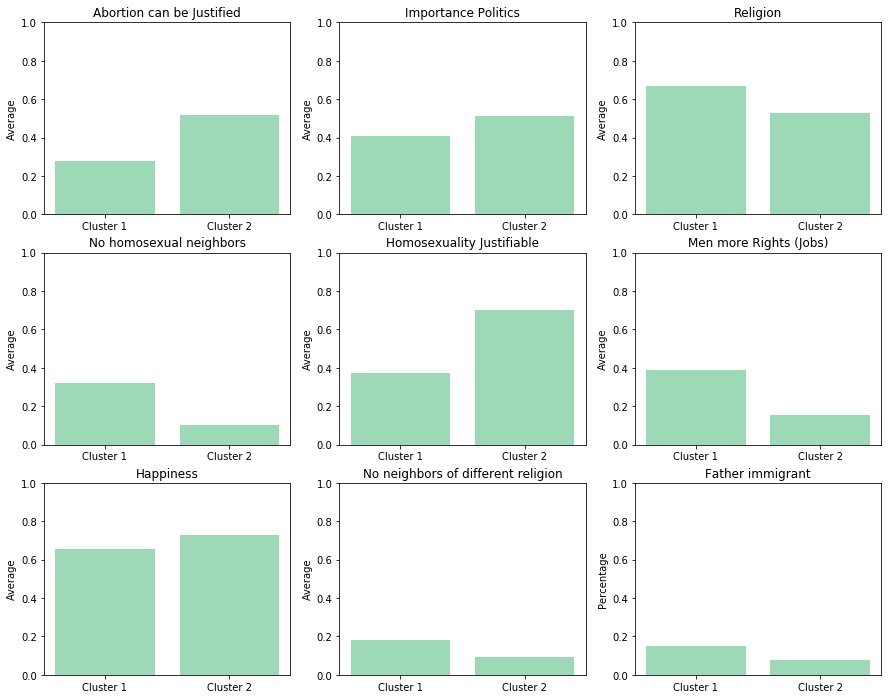

In [112]:
plot_cluster("cluster_ID_K")

##### GMM clusters
For the GMM clusters, the direction of all nine differences indicates a correlation of cluster one with higher survival and traditional values. The differences are rather small, especially when compared with the groups created with the two following clustering methods. 

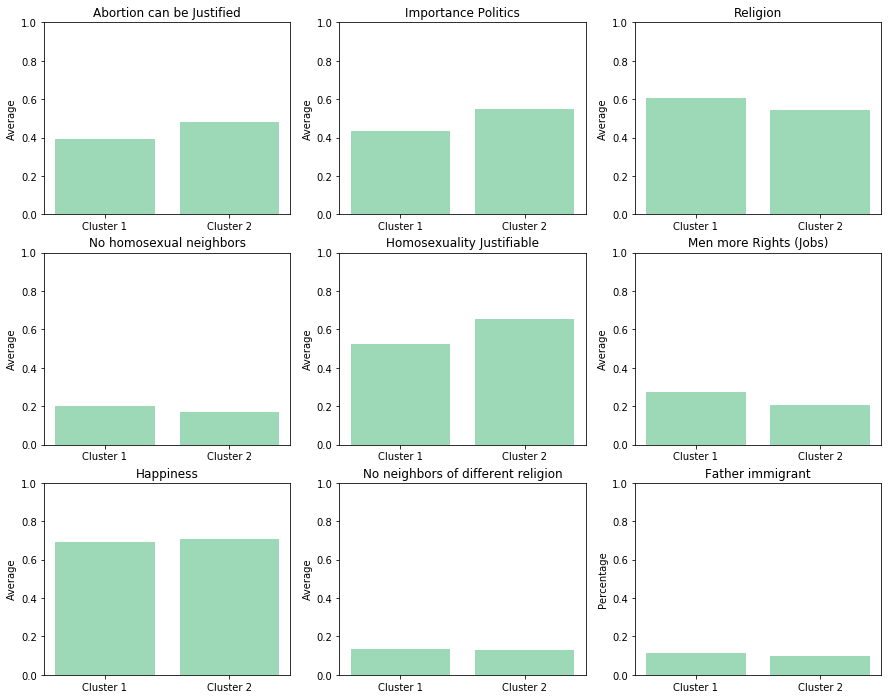

In [113]:
plot_cluster("cluster_ID_G")

##### Bayesian Gaussian Mixture Model Cluster
Cluster 2, formed by the Bayesian Gaussian Mixture model, shows higher secularrational values in the first row, with the exception of religiousness. Regarding the self-expression vs. survival scale, the second cluster visibly shows higher values on questions targeting self-expression. Especially striking is the seventh subplot, where one can see that no one in cluster 2 opposes neighbors of a different religion. For homosexual neighbors, cluster 1 opposes multiple times more often. 

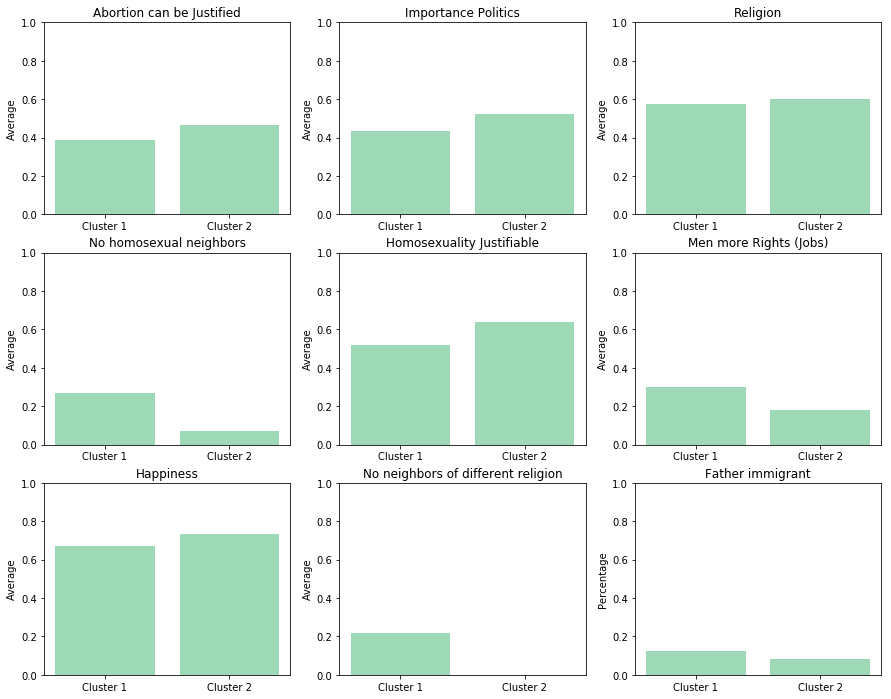

In [114]:
plot_cluster("cluster_ID_B")

##### Conclusion
Given these results, a hypothesis can be formulated that the k-means and BGMM clusters separate along the survival vs. self-expression dimension. 

# Part III: Life-Satisfaction Analysis on Clusters
 The above regression results on life-satisfaction are average effects and do not apply to all German citizens. How strongly which variables influence people’s life-satisfaction varies. Apart from individual differences, subgroups of the population can have different conditions. It is likely that life-satisfaction depends on different aspects of life in these subgroups.  
 
The theory of Maslow states that life-satisfaction depends on the satisfaction of hierarchical needs. Whenever basic needs are satisfied, finer needs and their satisfaction become relevant for the subjective well-being. Multiple empirical studies 

(Deaton 2008; Howell & Howell, 2008) have confirmed that life-satisfaction hinges on different variables in wealthy and less wealthy countries. It is possible that these effects occur as well in the within-nation clusters. 
 
It is likely that people in a society located at different poles of the two dimensions have diverging needs and face different levels of satisfaction of those and thus differ in their factors that most influence their life-satisfaction. As shown, the clusters found here separate the observations with regard of the two dimensions to some extent. Thus, the two clustering methods that produce clusters best align with the two dimensions are chosen for a more detailed analysis. A lasso regression based on each of these subgroups is conducted.  
 
The results of the lasso regression on both subgroups created by the BGMM and the k-means clustering are shown below. As one can see, some factors remain the same across all four analyses and some factors change. 
 
In all four cases, the two variables with the highest coefficient effects are the financial satisfaction and the freedom of choice and control over own life. More positive answers to both of these questions are strongest correlated amongst all variables and are selected in all four lasso regressions. These factors have also been found in the first part on the combined data set. 
 
Another variable that is selected via lasso from over 200 possible variables in all four cases is the question on whether people can be trusted or not. This variable is coded such that higher numbers indicate lower trust to people. Since all four coefficients are positive, although rather small, this means that, the more trust people have, the lower their life-satisfaction. As seen in Part I, the happiness variable correlates with the target as well.

In [220]:
# Use these clusters to split the data into two dataframes for each cluster
# Afterwards using a Lasso Regression to predict Life Satisfaction

In [45]:
df_C5 = df_c[df_c["cluster_ID_B"]==5]
df_C1 = df_c[df_c["cluster_ID_B"]==1]
df_C1.shape, df_C5.shape

((1227, 272), (819, 272))

In [46]:
# Delete all cluster information afterwards

In [47]:
df_C1 = df_C1.drop(["cluster_ID_B","cluster_ID_K","cluster_ID_G"], axis=1)
df_C5 = df_C5.drop(["cluster_ID_B","cluster_ID_K","cluster_ID_G"], axis=1)

In [49]:
df_C1.shape, df_C5.shape

((1227, 269), (819, 269))

### Lasso on the clusters

In [50]:
target_var="V23: Satisfaction with your life"
# Cluster "1"
Y_C1 = df_C1.loc[:,target_var].values
X_C1 = df_C1.loc[:, df_C1.columns != target_var]
trainX_C1, testX_C1, trainy_C1, testy_C1 = train_test_split(X_C1, Y_C1, test_size = 0.2, random_state = 1122)
# Cluster "5"
Y_C5 = df_C5.loc[:,target_var].values
X_C5 = df_C5.loc[:, df_C5.columns != target_var]
trainX_C5, testX_C5, trainy_C5, testy_C5 = train_test_split(X_C5, Y_C5, test_size = 0.2, random_state = 1122)

In [51]:
def lasso_mse(alpha, trainX, trainy, testX, testy):
    lasso = Lasso(alpha=alpha)
    lasso.fit(trainX, trainy)
    y_pred_lasso = lasso.predict(testX)
    mse = np.sqrt(np.mean((y_pred_lasso-testy)**2))
    nr_coef = len(lasso.coef_[lasso.coef_!=0])
    return([mse,nr_coef])

As we can see the mse has decreased when using one cluster only. Although n decreased to around a half.

In [66]:
grid = np.linspace(0.0001,0.01,10) 
results_mse = []
results_nr = []
for a in grid:
    output = lasso_mse(a, trainX_C5, trainy_C5, testX_C5, testy_C5)
    mse = output[0]
    nr = output[1]
    results_mse.append(mse)
    results_nr.append(nr)
    
alpha_values=pd.DataFrame()
alpha_values["MSE"]=results_mse
alpha_values["Number of Coefficients"]=results_nr
alpha_values["Alpha"]=grid
alpha_values

,MSE,Number of Coefficients,Alpha
0,0.154592,229,0.0001
1,0.140980,72,0.0012
2,0.142863,36,0.0023
3,0.145197,23,0.0034
4,0.147293,14,0.0045
5,0.149586,11,0.0056
6,0.151071,6,0.0067
7,0.152670,6,0.0078
8,0.154534,6,0.0089
9,0.156583,4,0.0100


The MSE also decreases for cluster "1" but not as much as for cluster "5". It seems like cluster 5 is more homogeneous.

In [67]:
results_mse = []
results_nr = []
for a in grid:
    output = lasso_mse(a, trainX_C1, trainy_C1, testX_C1, testy_C1)
    mse = output[0]
    nr = output[1]
    results_mse.append(mse)
    results_nr.append(nr)
    
alpha_values=pd.DataFrame()
alpha_values["MSE"]=results_mse
alpha_values["Number of Coefficients"]=results_nr
alpha_values["Alpha"]=grid
alpha_values

,MSE,Number of Coefficients,Alpha
0,0.164824,239,0.0001
1,0.150336,92,0.0012
2,0.150245,42,0.0023
3,0.151804,29,0.0034
4,0.153207,19,0.0045
5,0.154793,16,0.0056
6,0.156735,11,0.0067
7,0.158632,9,0.0078
8,0.160890,8,0.0089
9,0.163122,4,0.0100


### Lasso on Cluster "5"

In [55]:
# Using lasso regression with alpha = 0.0067
lasso5 = Lasso(alpha=0.0055)
lasso5.fit(trainX_C5, trainy_C5)
#y_pred_lasso = lasso.predict(testX_C5)
len(lasso5.coef_[lasso5.coef_!=0])

11

In [56]:
results=pd.DataFrame()
results["Question"]=X_C5.columns[lasso5.coef_!=0]
results["Coefficient"]=lasso5.coef_[lasso5.coef_!=0]
results

,Question,Coefficient
0,V10: Feeling of happiness,-0.243039
1,V11: State of health (subjective),-0.069968
2,V24: Most people can be trusted,-0.010088
3,V26: Active/Inactive membership: Sport or recreational organization,0.000771
4,V55: How much freedom of choice and control over own life,0.002455
5,V57: Marital status,-0.001935
6,V59: Satisfaction with financial situation of household,0.148051
7,V212: I see myself as a world citizen,-0.005228
8,V231: Nature of tasks: manual vs. intellectual,0.001770
9,V234: Are you supervising someone,-0.017483


In [63]:
#check results against the statistical models library function OLS of  
X = sm.add_constant(trainX_C5.iloc[:,lasso5.coef_!=0]) 
model = sm.OLS(trainy_C5, trainX_C5.iloc[:,lasso5.coef_!=0]).fit()
results_summary = model.summary()

# Note that tables is a list. The table at index 1 is the "core" table. Additionally, read_html puts dfs in a list, so we want index 0
results_as_html = results_summary.tables[1].as_html()
results_table = pd.read_html(results_as_html, header=0, index_col=0)[0]
alpha_value=0.01
results_table[results_table["P>|t|"]<alpha_value]

,coef,std err,t,P>|t|,[0.025,0.975]
V10: Feeling of happiness,-0.1717,0.041,-4.222,0.000,-0.252,-0.092
V24: Most people can be trusted,0.0400,0.014,2.814,0.005,0.012,0.068
V26: Active/Inactive membership: Sport or recreational organization,0.0502,0.016,3.161,0.002,0.019,0.081
V55: How much freedom of choice and control over own life,0.3799,0.030,12.611,0.000,0.321,0.439
V59: Satisfaction with financial situation of household,0.4617,0.029,15.827,0.000,0.404,0.519
V231: Nature of tasks: manual vs. intellectual,0.1379,0.021,6.524,0.000,0.096,0.179
V234: Are you supervising someone,0.0520,0.015,3.442,0.001,0.022,0.082
V235: Are you the chief wage earner in your house,0.0426,0.015,2.809,0.005,0.013,0.072


### Lasso on cluster "1"

In [64]:
# Using lasso regression with alpha = 0.0067
lasso1 = Lasso(alpha=0.0067)
lasso1.fit(trainX_C1, trainy_C1)
#y_pred_lasso = lasso.predict(testX_C5)
len(lasso1.coef_[lasso1.coef_!=0])
results=pd.DataFrame()
results["Question"]=X_C1.columns[lasso1.coef_!=0]
results["Coefficient"]=lasso1.coef_[lasso1.coef_!=0]
results

,Question,Coefficient
0,V10: Feeling of happiness,-0.416413
1,V11: State of health (subjective),-0.061402
2,V14: Important child qualities: Feeling of responsibility,-0.014436
3,V24: Most people can be trusted,-0.024249
4,V26: Active/Inactive membership: Sport or recreational organization,0.004687
5,V55: How much freedom of choice and control over own life,0.032145
6,V59: Satisfaction with financial situation of household,0.135194
7,V181: Worries: Losing my job or not finding a job,0.001072
8,V226: Vote in elections: local level,-0.001195
9,V227: Vote in elections: National level,-0.008156


In [65]:
#check results against the statistical models library function OLS of  
X = sm.add_constant(trainX_C1.iloc[:,lasso1.coef_!=0]) 
model = sm.OLS(trainy_C1, trainX_C1.iloc[:,lasso1.coef_!=0]).fit()
results_summary = model.summary()

# Note that tables is a list. The table at index 1 is the "core" table. Additionally, read_html puts dfs in a list, so we want index 0
results_as_html = results_summary.tables[1].as_html()
results_table = pd.read_html(results_as_html, header=0, index_col=0)[0]
alpha_value=0.01
results_table[results_table["P>|t|"]<alpha_value]

,coef,std err,t,P>|t|,[0.025,0.975]
V10: Feeling of happiness,-0.2111,0.030,-7.026,0.0,-0.270,-0.152
V24: Most people can be trusted,0.0596,0.013,4.460,0.0,0.033,0.086
V26: Active/Inactive membership: Sport or recreational organization,0.0815,0.015,5.356,0.0,0.052,0.111
V55: How much freedom of choice and control over own life,0.4051,0.023,17.622,0.0,0.360,0.450
V59: Satisfaction with financial situation of household,0.4617,0.024,19.492,0.0,0.415,0.508
V181: Worries: Losing my job or not finding a job,0.1846,0.019,9.724,0.0,0.147,0.222
V237: Family savings during past year,0.0905,0.021,4.269,0.0,0.049,0.132


### Lasso on k-means cluster

In [119]:
df_C5_k = df_c[df_c["cluster_ID_K"]==1]
df_C1_k = df_c[df_c["cluster_ID_K"]==0]
df_C1_k.shape, df_C5_k.shape

((1200, 272), (846, 272))

In [120]:
df_C1_k = df_C1_k.drop(["cluster_ID_B","cluster_ID_K","cluster_ID_G"], axis=1)
df_C5_k = df_C5_k.drop(["cluster_ID_B","cluster_ID_K","cluster_ID_G"], axis=1)

In [121]:
target_var="V23: Satisfaction with your life"
# Cluster "1"
Y_C1_k = df_C1_k.loc[:,target_var].values
X_C1_k = df_C1_k.loc[:, df_C1_k.columns != target_var]
trainX_C1_k, testX_C1_k, trainy_C1_k, testy_C1_k = train_test_split(X_C1_k, Y_C1_k, test_size = 0.2, random_state = 1122)
# Cluster "5"
Y_C5_k = df_C5_k.loc[:,target_var].values
X_C5_k = df_C5_k.loc[:, df_C5_k.columns != target_var]
trainX_C5_k, testX_C5_k, trainy_C5_k, testy_C5_k = train_test_split(X_C5_k, Y_C5_k, test_size = 0.2, random_state = 1122)

In [122]:
grid = np.linspace(0.0001,0.01,10) 
results_mse = []
results_nr = []
for a in grid:
    output = lasso_mse(a, trainX_C5_k, trainy_C5_k, testX_C5_k, testy_C5_k)
    mse = output[0]
    nr = output[1]
    results_mse.append(mse)
    results_nr.append(nr)
    
alpha_values=pd.DataFrame()
alpha_values["MSE"]=results_mse
alpha_values["Number of Coefficients"]=results_nr
alpha_values["Alpha"]=grid
alpha_values

,MSE,Number of Coefficients,Alpha
0,0.189444,240,0.0001
1,0.162685,96,0.0012
2,0.160800,50,0.0023
3,0.160764,35,0.0034
4,0.161980,24,0.0045
5,0.163982,14,0.0056
6,0.166388,11,0.0067
7,0.169203,10,0.0078
8,0.171588,6,0.0089
9,0.173539,6,0.0100


In [123]:
results_mse = []
results_nr = []
for a in grid:
    output = lasso_mse(a, trainX_C1_k, trainy_C1_k, testX_C1_k, testy_C1_k)
    mse = output[0]
    nr = output[1]
    results_mse.append(mse)
    results_nr.append(nr)
    
alpha_values=pd.DataFrame()
alpha_values["MSE"]=results_mse
alpha_values["Number of Coefficients"]=results_nr
alpha_values["Alpha"]=grid
alpha_values

,MSE,Number of Coefficients,Alpha
0,0.147095,232,0.0001
1,0.128297,71,0.0012
2,0.127963,30,0.0023
3,0.129673,21,0.0034
4,0.132034,13,0.0045
5,0.134725,11,0.0056
6,0.137888,10,0.0067
7,0.140539,6,0.0078
8,0.143050,5,0.0089
9,0.145794,3,0.0100


In [126]:
# Using lasso regression with alpha = 0.0067
lasso5_k = Lasso(alpha=0.0067)
lasso5_k.fit(trainX_C5_k, trainy_C5_k)
len(lasso5_k.coef_[lasso5_k.coef_!=0])

11

In [127]:
results=pd.DataFrame()
results["Question"]=X_C5_k.columns[lasso5_k.coef_!=0]
results["Coefficient"]=lasso5_k.coef_[lasso5_k.coef_!=0]
results

,Question,Coefficient
0,V10: Feeling of happiness,-0.430546
1,V11: State of health (subjective),-0.083056
2,V14: Important child qualities: Feeling of responsibility,-0.007331
3,V24: Most people can be trusted,-0.004869
4,V55: How much freedom of choice and control over own life,0.039722
5,V59: Satisfaction with financial situation of household,0.160909
6,"V160D: I see myself as someone who: is relaxed, handles stress well",0.014702
7,V160I: I see myself as someone who: gets nervous easily,-0.005019
8,V176: Things done for reasons of security: Didn’t carry much money,-0.008709
9,V227: Vote in elections: National level,-0.006535


In [128]:
#check results against the statistical models library function OLS of  
X = sm.add_constant(trainX_C5_k.iloc[:,lasso5_k.coef_!=0]) 
model = sm.OLS(trainy_C5_k, trainX_C5_k.iloc[:,lasso5_k.coef_!=0]).fit()
results_summary = model.summary()

# Note that tables is a list. The table at index 1 is the "core" table. Additionally, read_html puts dfs in a list, so we want index 0
results_as_html = results_summary.tables[1].as_html()
results_table = pd.read_html(results_as_html, header=0, index_col=0)[0]
alpha_value=0.01
results_table[results_table["P>|t|"]<alpha_value]

,coef,std err,t,P>|t|,[0.025,0.975]
V10: Feeling of happiness,-0.2661,0.036,-7.327,0.000,-0.337,-0.195
V24: Most people can be trusted,0.0723,0.017,4.373,0.000,0.040,0.105
V55: How much freedom of choice and control over own life,0.2901,0.028,10.519,0.000,0.236,0.344
V59: Satisfaction with financial situation of household,0.4432,0.030,15.022,0.000,0.385,0.501
"V160D: I see myself as someone who: is relaxed, handles stress well",0.3227,0.028,11.352,0.000,0.267,0.378
V160I: I see myself as someone who: gets nervous easily,0.0824,0.026,3.171,0.002,0.031,0.133
V237: Family savings during past year,0.0884,0.026,3.397,0.001,0.037,0.140


In [129]:
# Using lasso regression with alpha = 0.0067
lasso1_k = Lasso(alpha=0.0067)
lasso1_k.fit(trainX_C1_k, trainy_C1_k)
len(lasso1_k.coef_[lasso1_k.coef_!=0])
results=pd.DataFrame()
results["Question"]=X_C1_k.columns[lasso1_k.coef_!=0]
results["Coefficient"]=lasso1_k.coef_[lasso1_k.coef_!=0]
results

,Question,Coefficient
0,V10: Feeling of happiness,-0.292087
1,V11: State of health (subjective),-0.003555
2,V24: Most people can be trusted,-0.015969
3,V55: How much freedom of choice and control over own life,0.006394
4,V57: Marital status,-0.002234
5,V59: Satisfaction with financial situation of household,0.120007
6,V148: Believe in: God,-0.004880
7,V181: Worries: Losing my job or not finding a job,0.012211
8,V213: I see myself as part of my local community,-0.005896
9,V226: Vote in elections: local level,-0.011528


In [130]:
#check results against the statistical models library function OLS of  
X = sm.add_constant(trainX_C1_k.iloc[:,lasso1_k.coef_!=0]) 
model = sm.OLS(trainy_C1_k, trainX_C1_k.iloc[:,lasso1_k.coef_!=0]).fit()
results_summary = model.summary()

# Note that tables is a list. The table at index 1 is the "core" table. Additionally, read_html puts dfs in a list, so we want index 0
results_as_html = results_summary.tables[1].as_html()
results_table = pd.read_html(results_as_html, header=0, index_col=0)[0]
alpha_value=0.01
results_table[results_table["P>|t|"]<alpha_value]

,coef,std err,t,P>|t|,[0.025,0.975]
V10: Feeling of happiness,-0.1283,0.031,-4.162,0.000,-0.189,-0.068
V11: State of health (subjective),0.0603,0.023,2.662,0.008,0.016,0.105
V24: Most people can be trusted,0.0333,0.012,2.818,0.005,0.010,0.057
V55: How much freedom of choice and control over own life,0.4890,0.024,20.505,0.000,0.442,0.536
V59: Satisfaction with financial situation of household,0.4230,0.022,19.201,0.000,0.380,0.466
V181: Worries: Losing my job or not finding a job,0.1508,0.017,8.876,0.000,0.117,0.184


### Results
Cluster 2 was shown to be relatively more “self-expressing” and “rational-secular” than cluster 1. And indeed, the relevant variables suggest that this description is accurate. Looking at the two “survival” groups, a variable that additionally correlates with lifesatisfaction is the “worry of losing or not finding a job” with rather large coefficients. The coefficient size of around 0.15/ 0.18 is the fourth/third largest in these regressions, respectively. The more worry about jobs, the less life-satisfaction is reported for these clusters. Note, that this variable is not selected for the “self-expression” groups. 
 
The “self-expression” groups show different additional variables depending on the clustering methods. In the k-means “self-expression” group, two variables on mental well-being which capture stress resilience and nervousness are correlated with lifesatisfaction. The higher the stress resilience and the ability to cope with stress, the higher the life-satisfaction.  
 
In the BGM “self-expression” group, three work and self-actualization related variables are selected. Intellectual labour compared to manual labour correlates positively with life-satisfaction. Supervising someone or being the chief wage earner in the household are negatively correlated with life-satisfaction.  
 
These finding support the hypothesis that the clusters are formed along the survival / self-expression dimension and furthermore confirm Maslow’s theory on personal hierarchical needs. People in the “self-expression” clusters are financially secured and their life-satisfaction depends on subjective well-being (stress resilience) or work-lifebalance (not supervising, not chief earner). For people who are not financially secured yet, this aspect (no fear of job loss) is the main indicator for a satisfied life.

# References

Deaton, A. (2008). Income, health, and well-being around the world: Evidence from the Gallup World Poll. Journal of Economic perspectives, 22(2), 53-72.

Diener, E., & Suh, E. (1997). Measuring quality of life: Economic, social, and subjective indicators. Social indicators research, 40(1-2), 189-216.

Diener, E., Lucas, R. E., & Oishi, S. (2002). Subjective well-being: The science of happiness and life satisfaction. Handbook of positive psychology, 2, 63-73.

Diener, E., & Diener, M. (2009). Cross-cultural correlates of life satisfaction and self-esteem. In Culture and well-being (pp. 71-91). Springer, Dordrecht.

German Federal Agency for Civic Education 
https://www.bpb.de/gesellschaft/migration/laenderprofile/262758/historical-and-current-development-of-migration-to-and-from-germany (last accessed May, 6th 2019)

Hoge, D. R., Petrillo, G. H., & Smith, E. I. (1982). Transmission of religious and social values from parents to teenage children. Journal of Marriage and the Family.

Howell, R. T., & Howell, C. J. (2008). The relation of economic status to subjective well-being in developing countries: A meta-analysis. Psychological bulletin, 134(4), 536.

Inglehart, R. (1997). Modernization and postmodernization: Cultural, economic, and political change in 43 societies. Princeton university press, page 81-98. ALSO WEBSITE

Inglehart, R., & Baker, W. E. (2000). Modernization, Cultural Change, and the Persistence of Traditional Values. American Sociological Review, 65(1), 19.

Inglehart, R., & Welzel, C. (2010). Changing Mass Priorities: The Link between Modernization and Democracy. Perspectives on Politics, 8(02), 551–567.

Inglehart, R., C. Haerpfer, A. Moreno, C. Welzel, K. Kizilova, J. Diez-Medrano, M. Lagos, P. Norris, E. Ponarin & B. Puranen et al. (eds.). 2014. World Values Survey: Round Six - Country-Pooled Datafile Version: www.worldvaluessurvey.org/WVSDocumentationWV6.jsp. Madrid: JD Systems Institute. 

James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). An introduction to statistical learning (Vol. 112, p. 18). New York: springer.

Maslow, A. H. (1943). A theory of human motivation. Psychological review, 50(4), 370.

Maslow, A. H., Frager, R., Fadiman, J., McReynolds, C., & Cox, R. (1970). Motivation and personality. Harper & Row New York. McClelland, DC, & Burnham, DH (1976). Power is the great motivator. Harvard Business Review, 25, 159-166.

Oishi, S., Diener, E., Lucas, R. E., & Suh, E. M. (2009). Cross-cultural variations in predictors of life satisfaction: Perspectives from needs and values. In Culture and well-being (pp. 109-127). Springer, Dordrecht.

Veenhoven, R. (1991). Is happiness relative? Social Indicators Research, 24, 1–34.
